# Problem Statement:

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense cna be given to marketing team and plan the strategy accordingly.

## Content we have in our Dataset:

You are owning a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.


Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

## Importing helpfull libraries for data manipulation and handling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline

# Importing the clustering model
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

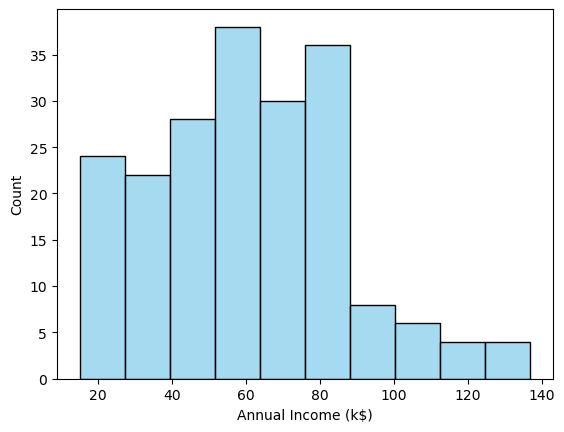

In [4]:
sns.histplot(df["Annual Income (k$)"], color = "skyblue")

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

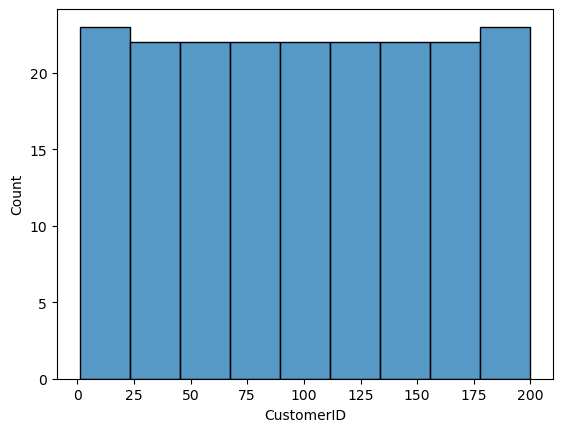

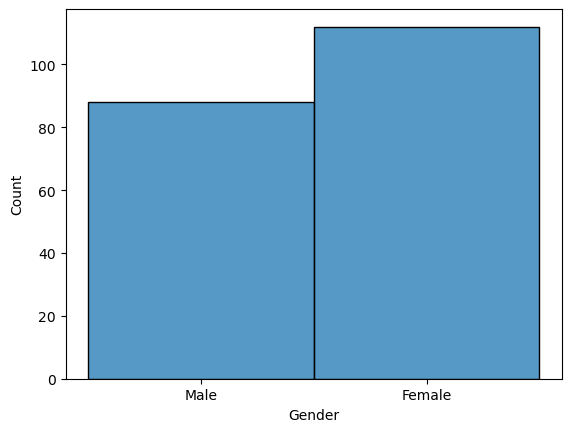

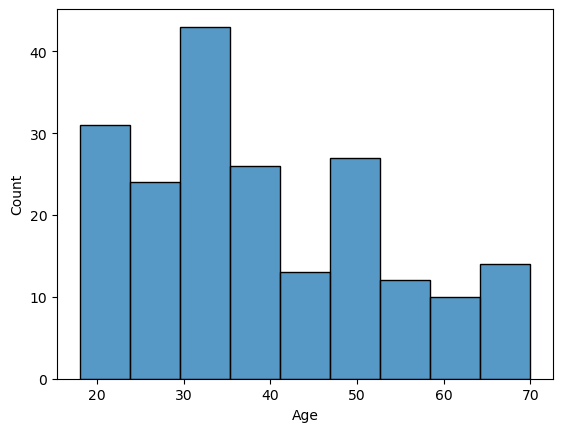

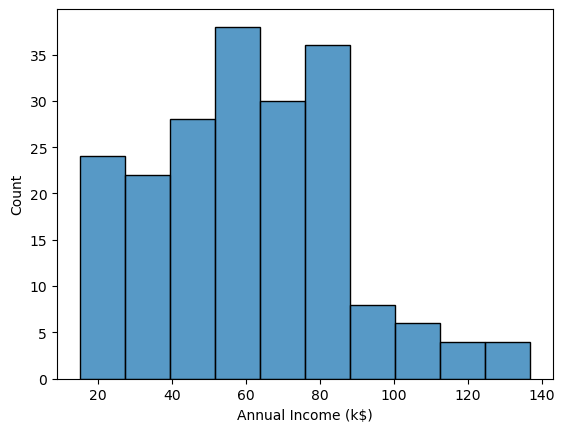

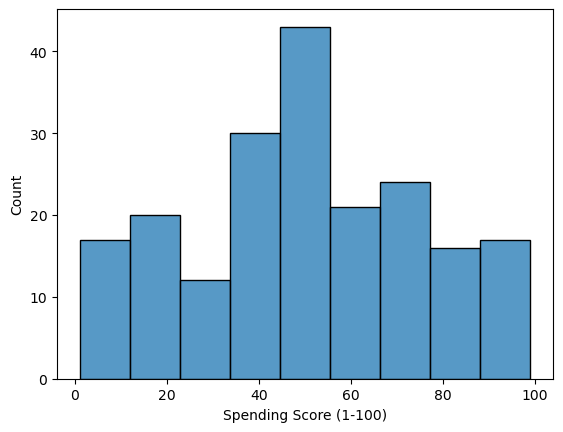

In [6]:
cols = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in cols:
    plt.figure(i)
    sns.histplot(df[i])

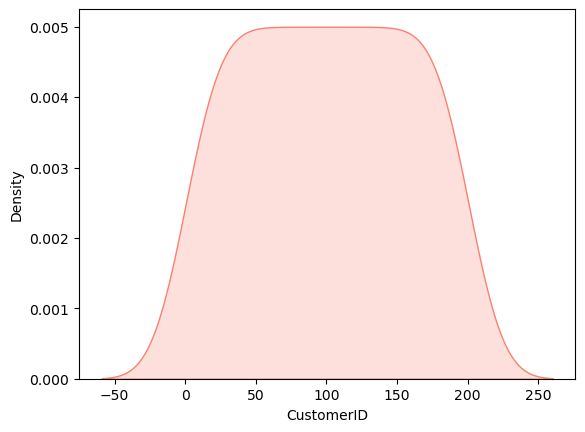

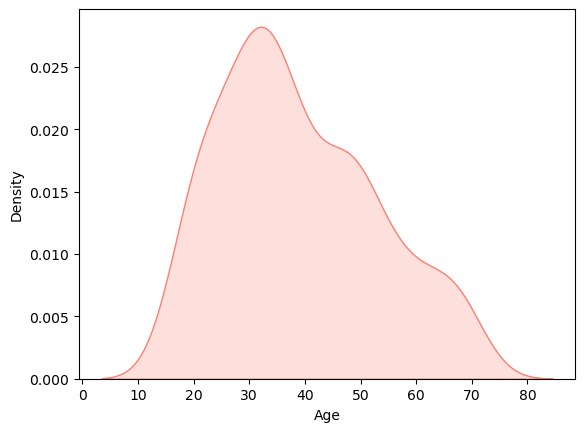

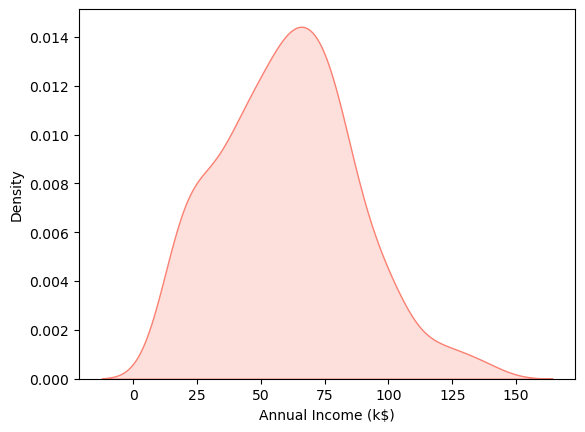

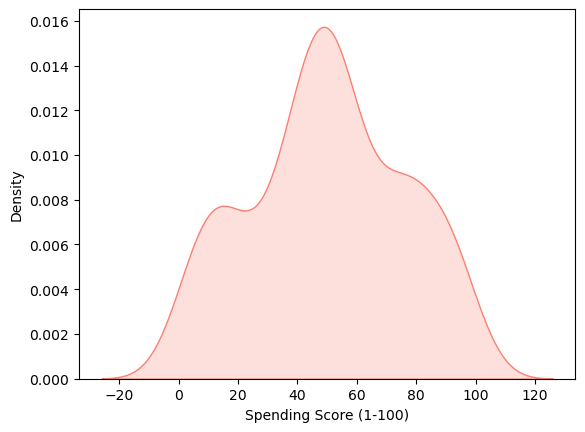

In [7]:
cols = ['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in cols:
    plt.figure(i)
    sns.kdeplot(df[i], fill = True, color = "salmon")

In [8]:
df.Gender.value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

C:\Users\sonim\OneDrive\Desktop\sample_project\env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


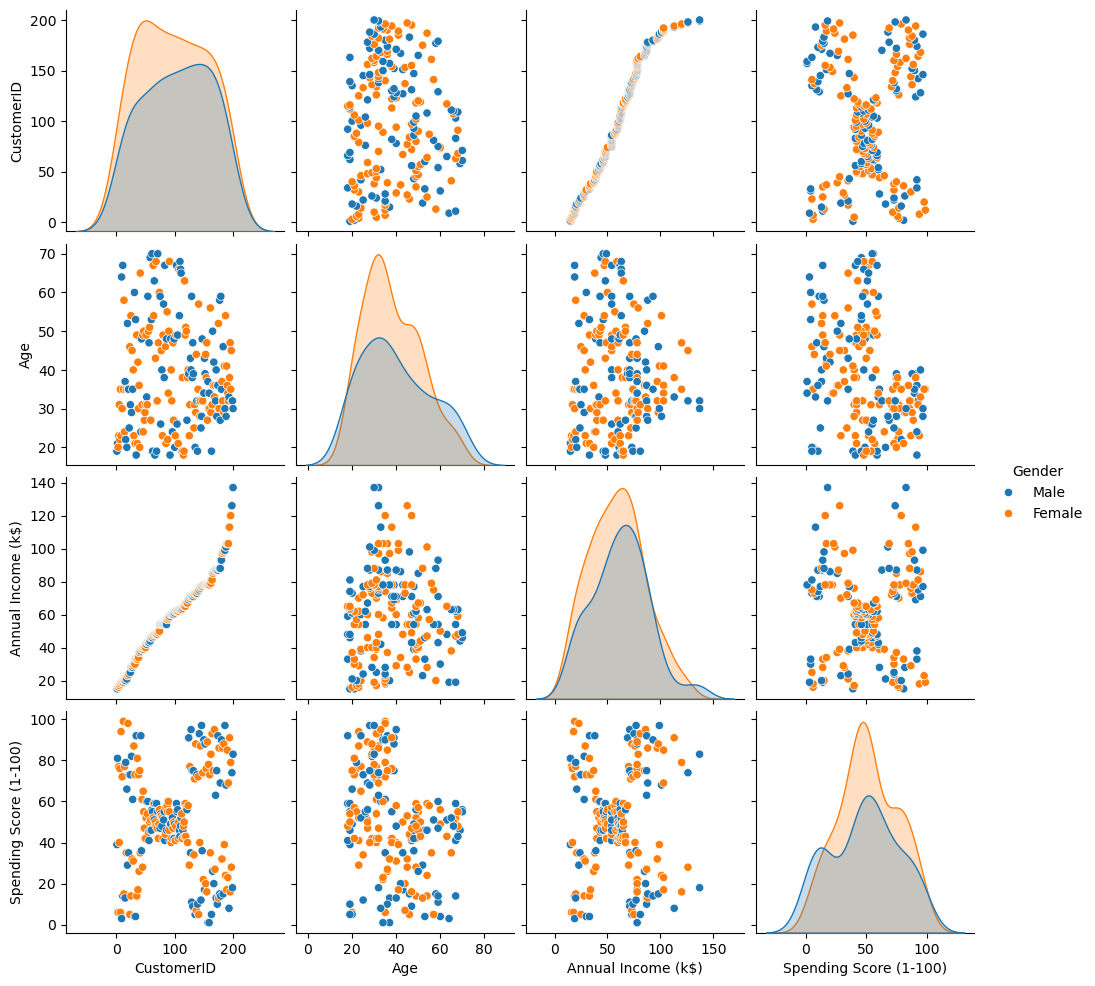

In [9]:
sns.pairplot(df, hue="Gender")

<Axes: >

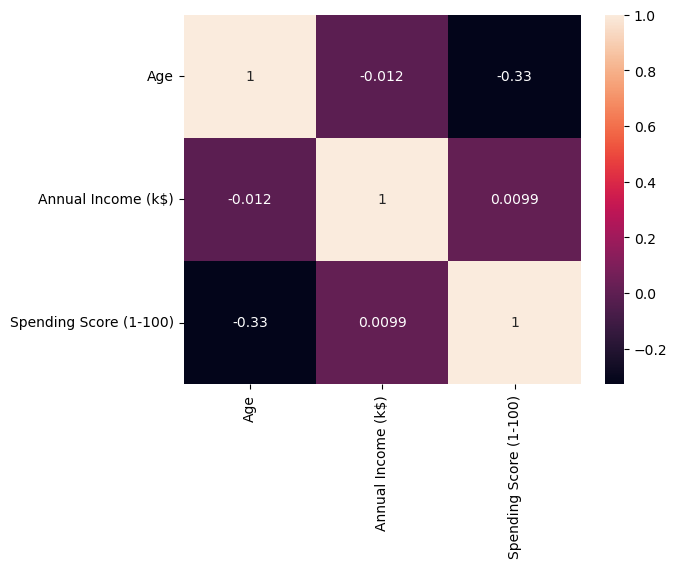

In [10]:
sns.heatmap(df.drop(["Gender", "CustomerID"], axis = 1).corr(), annot=True)

### Clustering

In [11]:
X = df.iloc[:, [3,4]].values
# by this I've got the columns of annual income and spending score

In [12]:
# finding the optimal number of the clusters using the elbow method

sse_list = [] # sse = Sum of squared errors

# we always assume that the max number of cluster would be 10
# so you can judge the number of clusters by doing average

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto")
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)
    
    # inertia_ is the formula used to segregate the data points into clusters

C:\Users\sonim\OneDrive\Desktop\sample_project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sonim\OneDrive\Desktop\sample_project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sonim\OneDrive\Desktop\sample_project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sonim\OneDrive\Desktop\sample_project\env\lib\sit

In [13]:
sse_list

[269981.28,
 185917.14253928524,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 38858.9599751439,
 31969.426550235476,
 29858.483597603947,
 22209.851608025543,
 20786.93669205916]

Text(0, 0.5, 'sse')

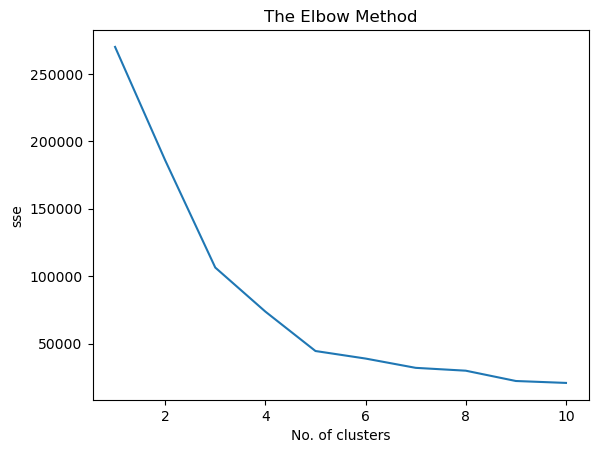

In [14]:
# Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11), sse_list)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("sse")


In [15]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0, n_init= "auto")
y_kmeans= kmeansmodel.fit_predict(X)

C:\Users\sonim\OneDrive\Desktop\sample_project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


> For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_transform()"

> y_kmeans is the final model. Now how and where we will deploy this model in production is depends on what tool we are using.

> This use case is very common and it is used in BFS industry (credit card) and retail for customer segmentation.

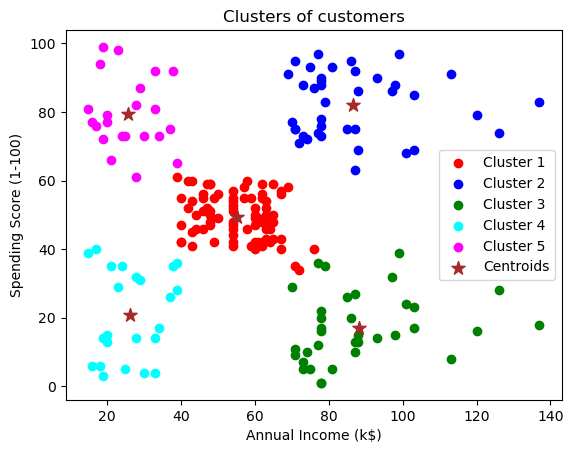

In [16]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1],marker='*', s = 100, c = 'brown', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Model Interpretation 
    1. Cluster 1 (Red Color) -> earning high but spending less
    2. Cluster 2 (Blue Colr) -> average in terms of earning and spending 
    3. Cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
    4. Cluster 4 (cyan Color) -> earning less but spending more
    5. Cluster 5 (magenta Color) -> Earning less , spending less


###### We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse ######
wherein others we can set like once in a week or once in a month
